In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
from ALLCools.mcds import MCDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import pathlib
import logging
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, pairwise_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
from scipy.stats import zscore, ranksums, pearsonr, spearmanr
from scipy.sparse import load_npz, save_npz, csr_matrix
from scipy.cluster.hierarchy import fclusterdata, linkage, fcluster
from statsmodels.sandbox.stats.multicomp import multipletests as FDR
from umap import UMAP
import harmonypy as hm
import scanorama

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy.external as sce

from ALLCools.clustering import tsne, significant_pc_test, filter_regions, remove_black_list_region, lsi, binarize_matrix
from ALLCools.plot import *

import xarray as xr
from ALLCools.mcds.utilities import calculate_posterior_mc_frac

from ALLCools.mcds import RegionDS

In [3]:
from itertools import cycle, islice
import seaborn as sns
from glob import glob

color = np.array(list(islice(cycle(['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231',
                                    '#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe',
                                    '#008080','#e6beff','#aa6e28','#800000','#aaffc3',
                                    '#808000','#ffd8b1','#000080','#808080','#000000']), 100)))

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [4]:
mcad = anndata.read_h5ad('/gale/netapp/entex/ENTEx/tissue/M1C/matrix/cell_8225_M1C_5kCG_100k3C.h5ad')

In [5]:
mcad.obsm

AxisArrays with keys: 100k3C_pca, 100k3C_u15hm, 100k3C_u15hm_tsne, 100k3C_u20hm, 100k3C_u20hm_tsne, 5kCG100k3C_u35u20, 5kCG100k3C_u35u20_tsne, 5kCG_pca, 5kCG_u35hm, 5kCG_u35hm_tsne, 5kCG_u50_tsne, X_pca, X_pca_harmony, X_tsne

In [6]:
def dump_embedding(adata, name, n_dim=2):
    # put manifold coordinates into adata.obs
    for i in range(n_dim):
        adata.obs[f'{name}_{i}'] = adata.obsm[f'X_{name}'][:, i]
    return adata

In [6]:
#mcad.obsm['X_tsne'] = mcad.obsm['5kCG_u35hm_tsne'].copy()

mcad.obsm['X_tsne'] = mcad.obsm['5kCG_pca'].copy()

In [25]:
coord_base = 'tsne'

In [46]:
#mch_adata.obsm['X_pca'] = mch_adata.obsm['X_pca'].copy()
tsne(mcad, obsm='X_pca', metric='euclidean', exaggeration=-1, perplexity=50, n_jobs=-1)

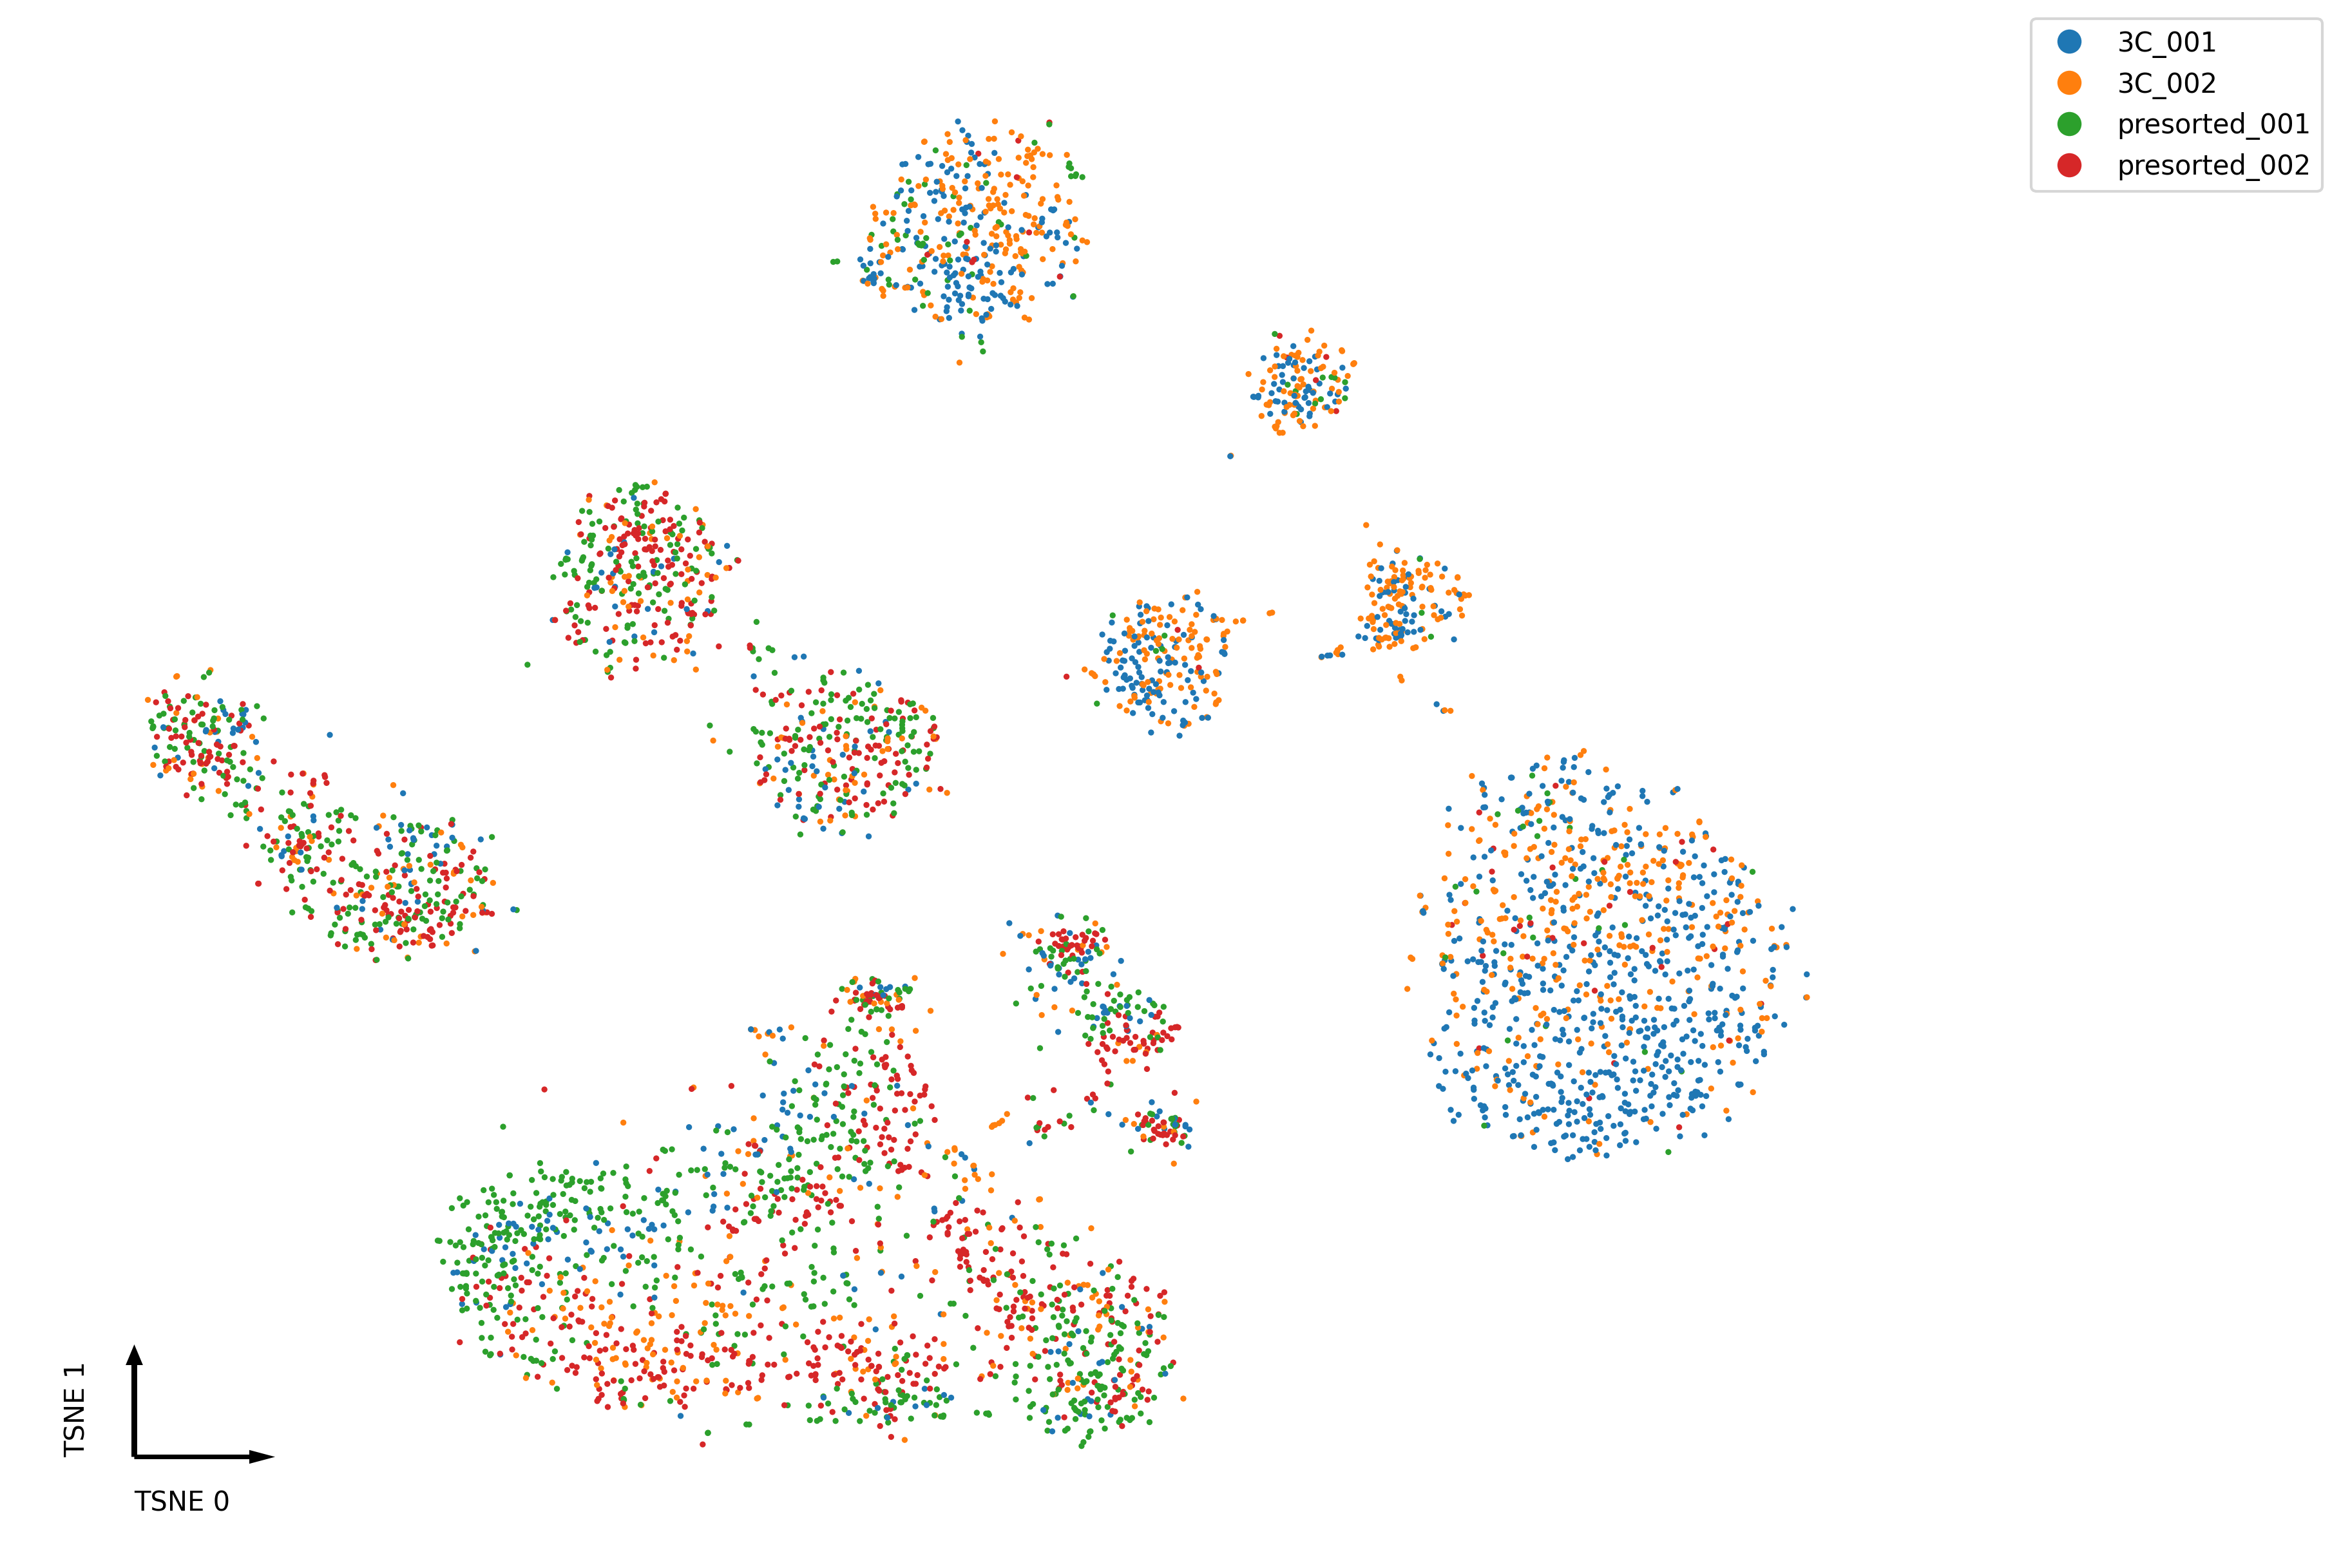

In [47]:
#mcad.obsm['X_tsne'] = mcad.obsm['100k3C_u20hm_tsne'].copy()
mcad = dump_embedding(mcad, 'tsne')

fig, ax = plt.subplots(figsize=(12, 8), dpi=300, constrained_layout=True)
_ = categorical_scatter(data=mcad.obs,
                        ax=ax,
                        coord_base=coord_base,
                        hue='Sample',
                        labelsize=10,
                        show_legend=True)

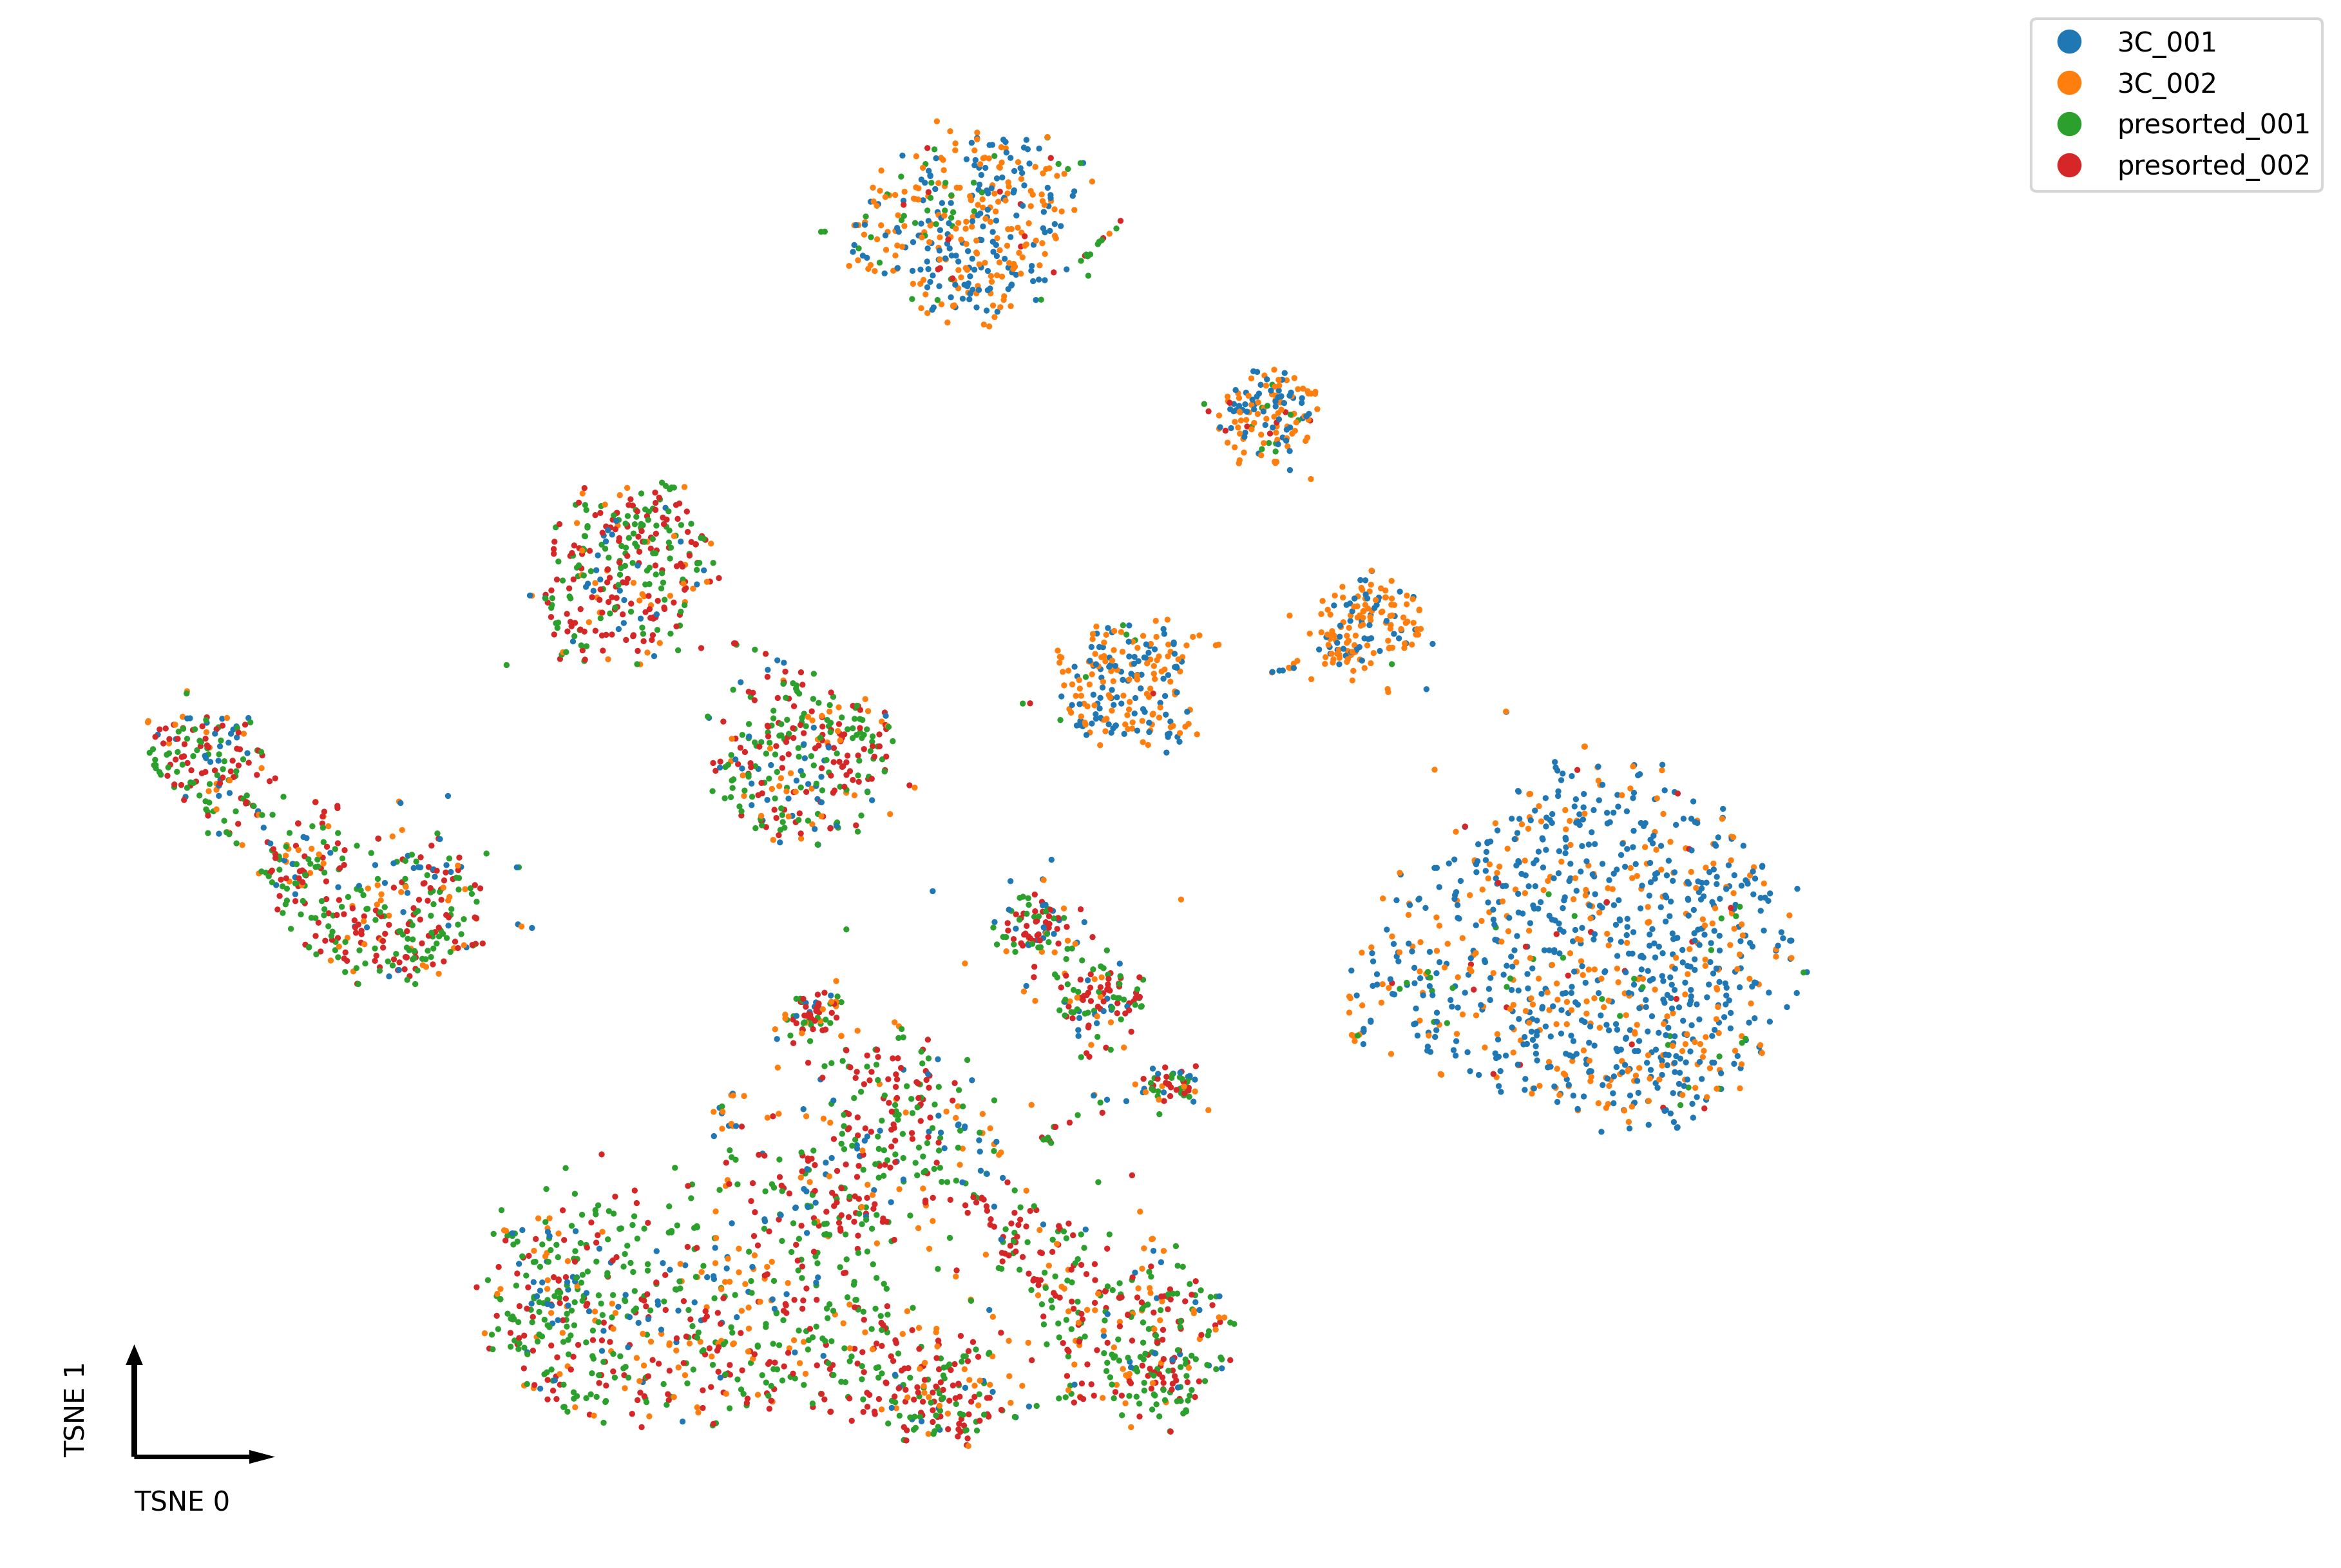

In [51]:
mcad.obsm['X_tsne'] = mcad.obsm['100k3C_u20hm_tsne'].copy()
mcad = dump_embedding(mcad, 'tsne')

fig, ax = plt.subplots(figsize=(12, 8), dpi=300, constrained_layout=True)
_ = categorical_scatter(data=mcad.obs,
                        ax=ax,
                        coord_base=coord_base,
                        hue='Sample',
                        labelsize=10,
                        show_legend=True)

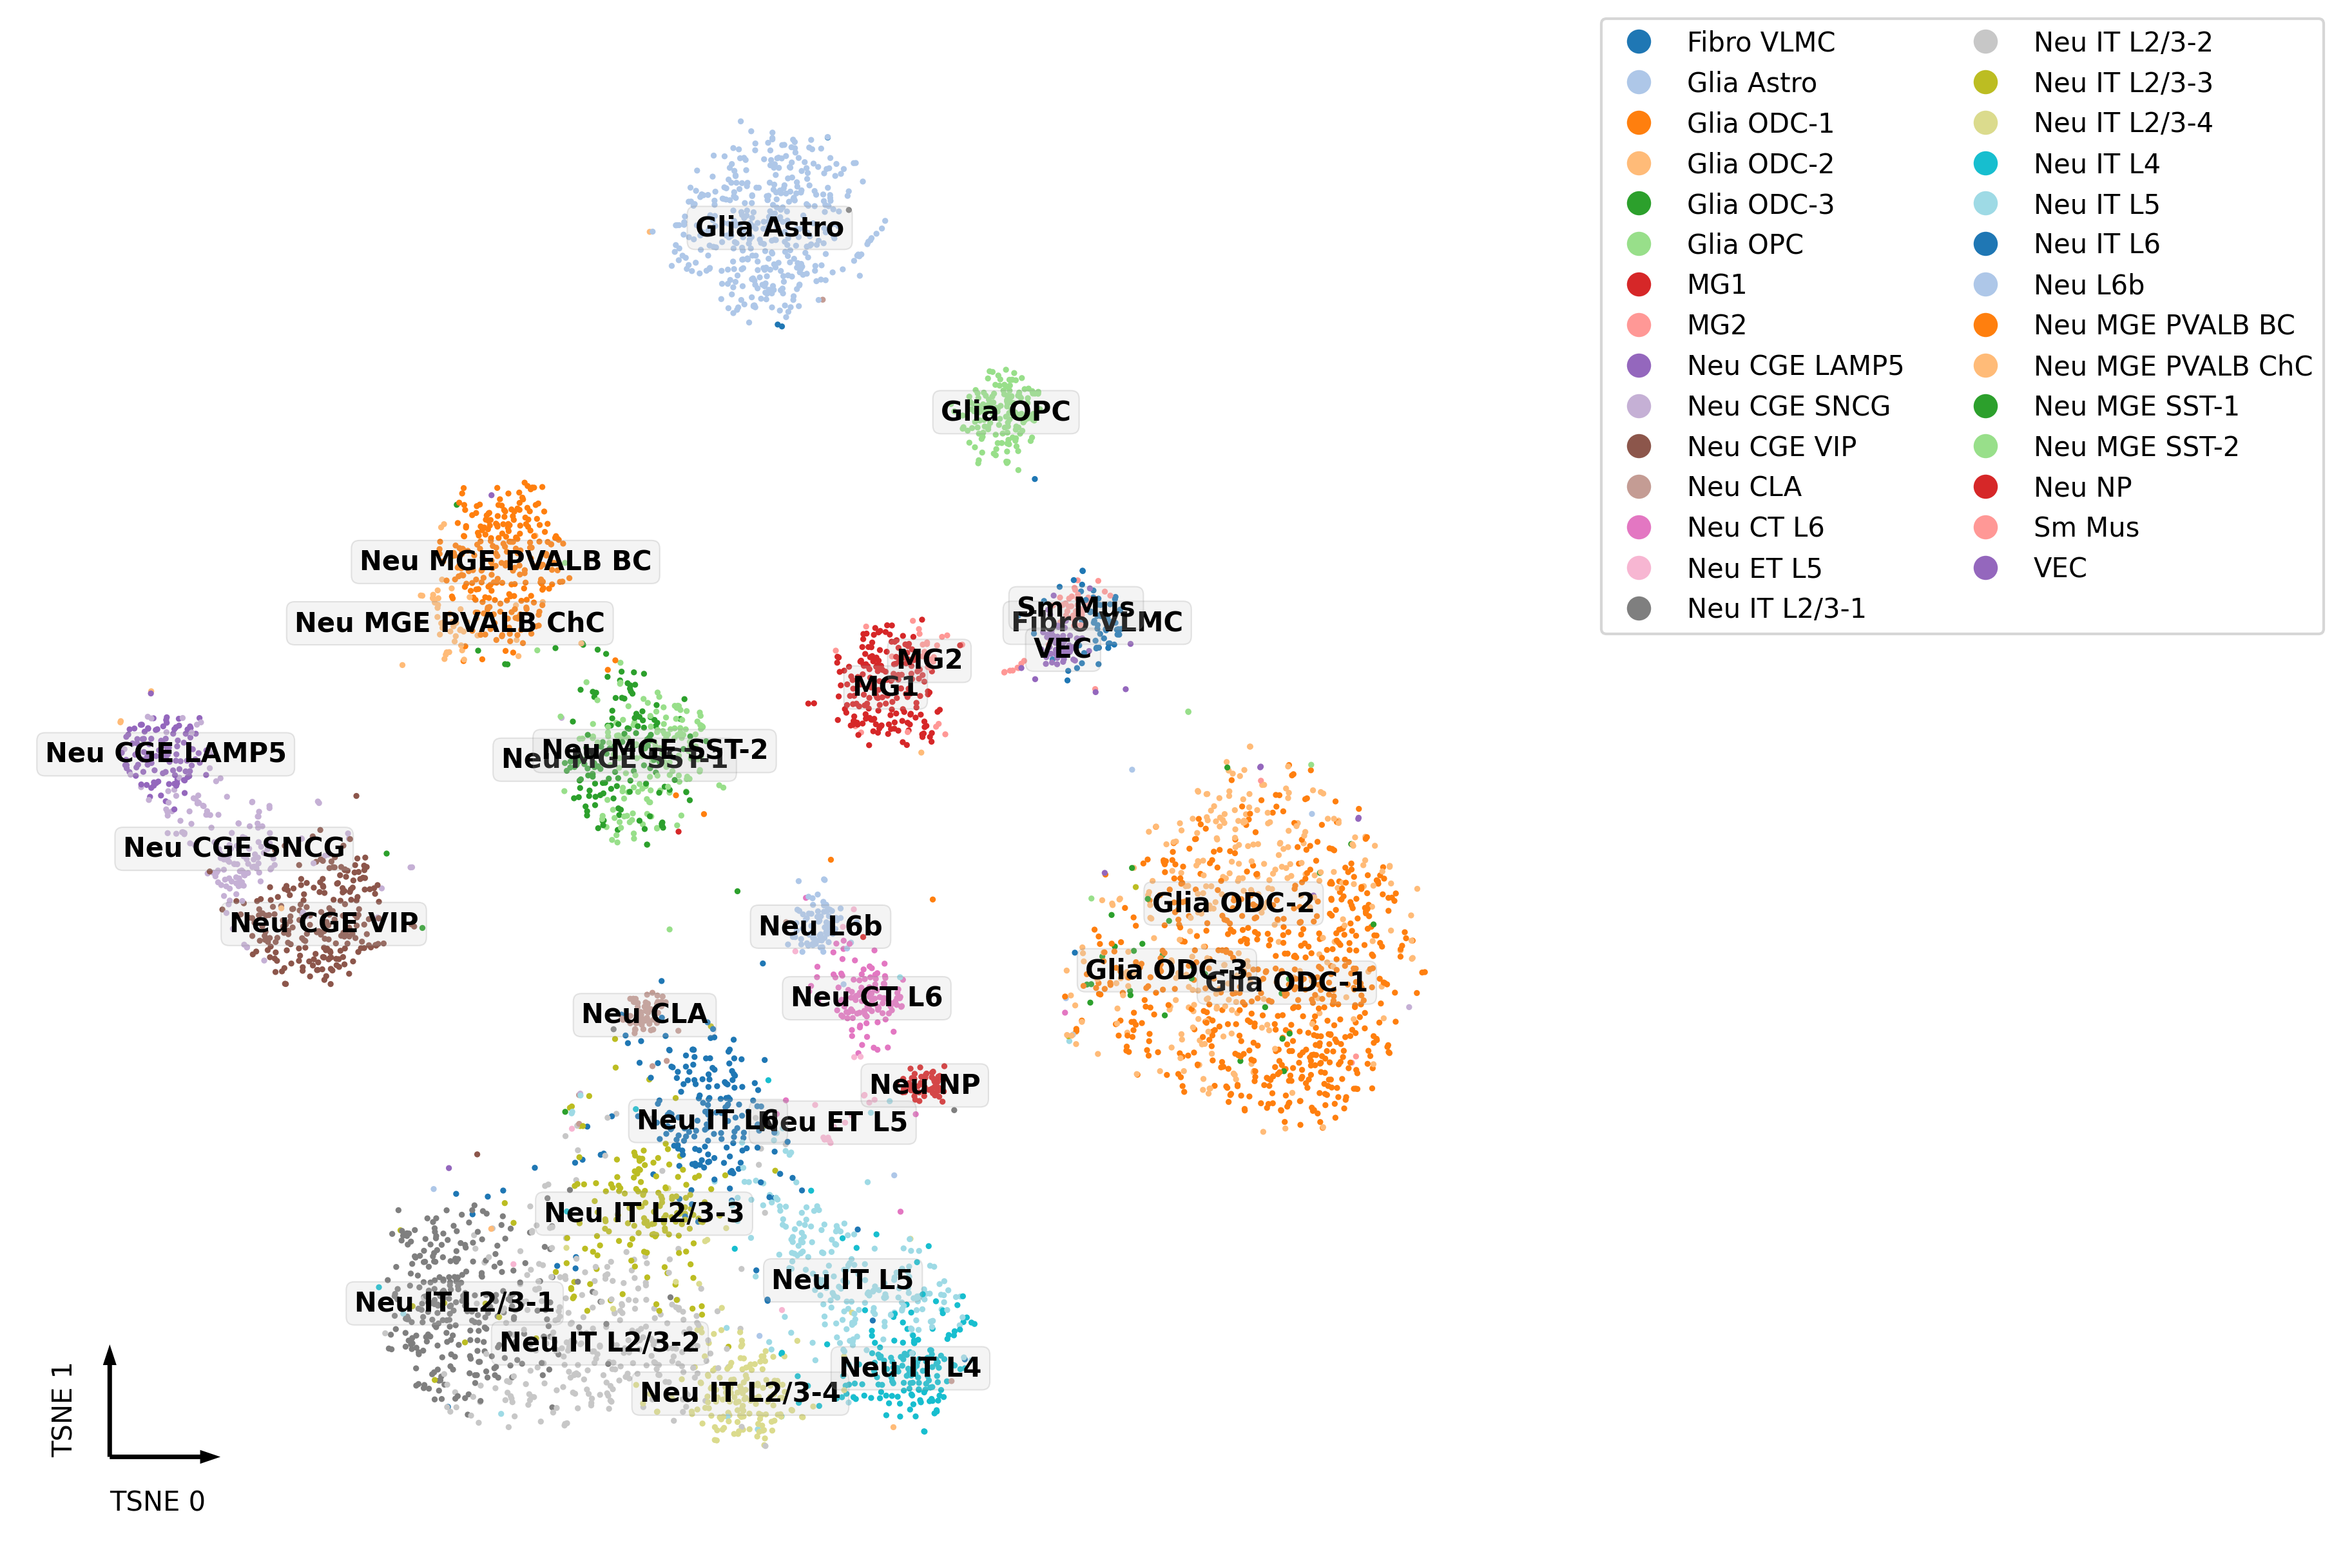

In [52]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, constrained_layout=True)
_ = categorical_scatter(data=mcad.obs,
                        ax=ax,
                        coord_base=coord_base,
                        hue='celltype',
                        text_anno='celltype',
                        labelsize=10,
                        palette='tab20',
                        show_legend=True)

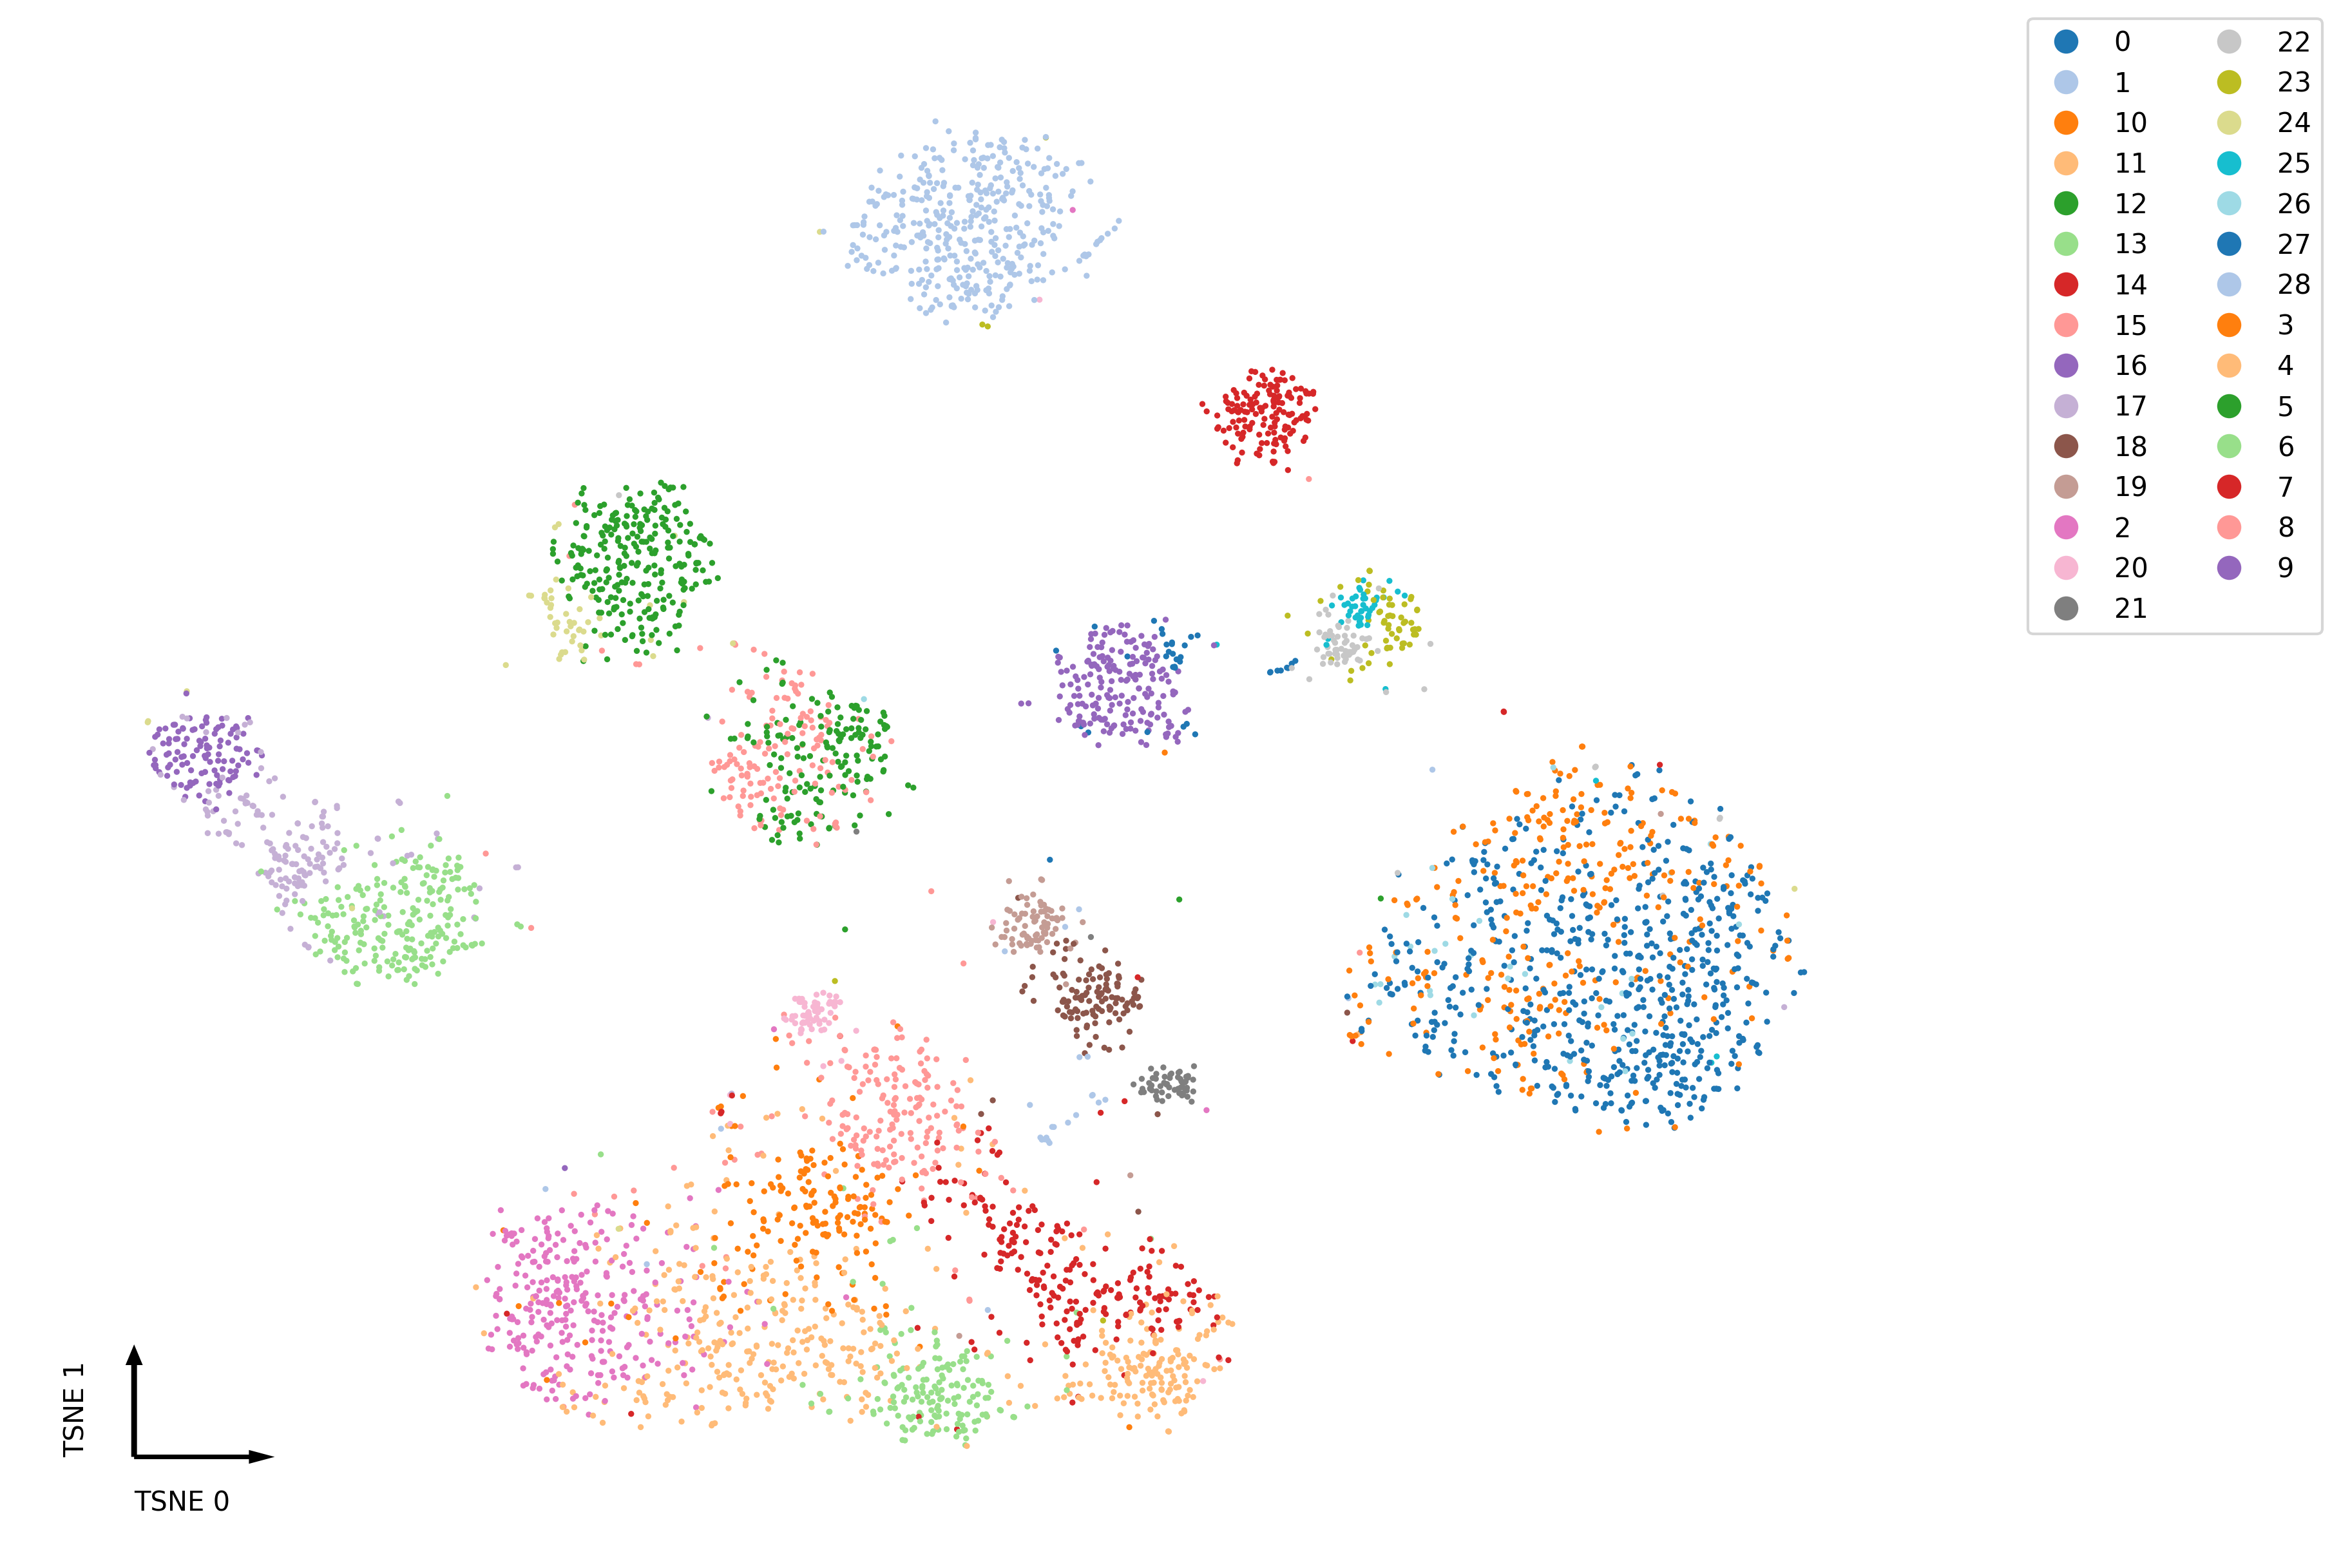

In [55]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, constrained_layout=True)
_ = categorical_scatter(data=mcad.obs,
                        ax=ax,
                        coord_base=coord_base,
                        hue='5kCG100k3C_u35u20_leiden_1.6',
                        labelsize=10,
                        palette='tab20',
                        show_legend=True)

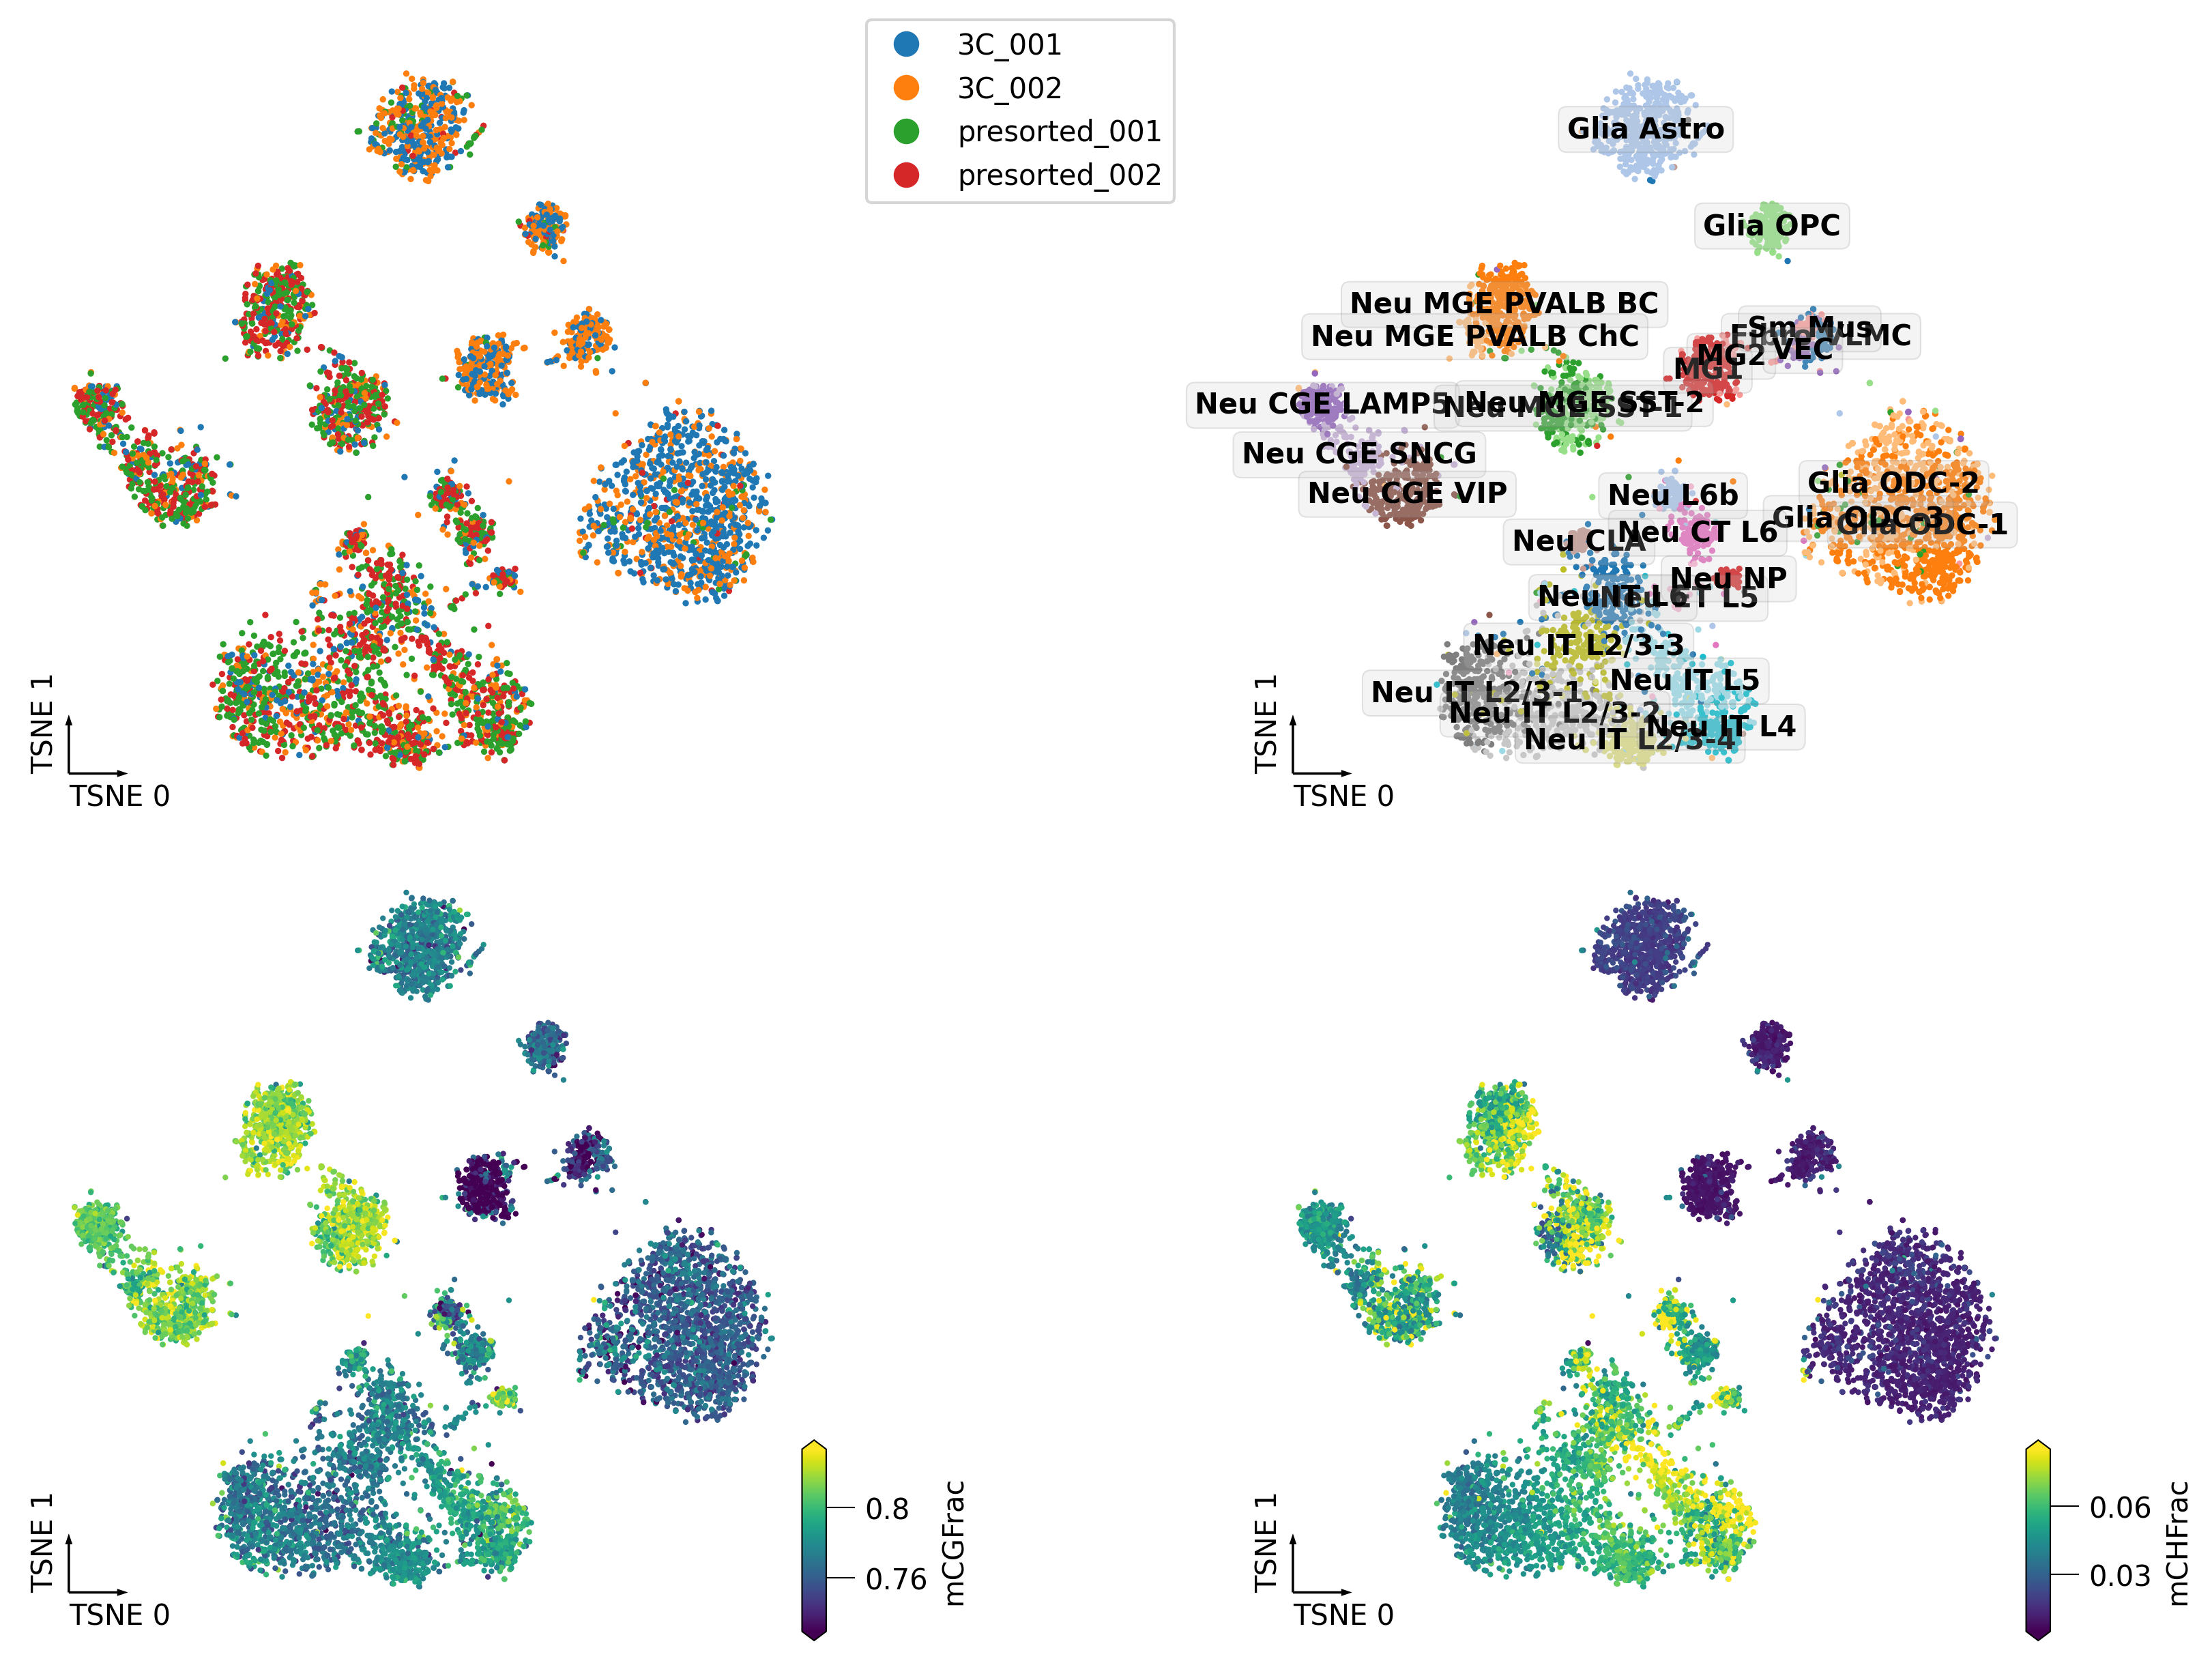

In [31]:
#mcad.obsm['X_umap'] = mcad.obsm['5kCG_u40_umap'].copy()
#mcad = dump_embedding(mcad, 'umap')

coord_base = 'tsne'
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300, constrained_layout=True)
_ = categorical_scatter(data=mcad.obs,
                        ax=axes[0,0],
                        coord_base=coord_base,
                        hue='Sample',
                        labelsize=10,
                        show_legend=True)

'''
_ = continuous_scatter(ax=axes[0,1],
                       data=mcad.obs,
                       hue='FinalmCReads',
                       coord_base=coord_base,
                       max_points=None,
                       labelsize=10,
                       s=4)

_ = categorical_scatter(data=mcad.obs,
                        ax=axes[0,2],
                        coord_base=coord_base,
                        hue='5kCG100k3C_u35u20_leiden_1.6',
                        text_anno=f'5kCG100k3C_u35u20_leiden_1.6',
                        labelsize=10,
                        show_legend=True)
'''                        

_ = categorical_scatter(data=mcad.obs,
                        ax=axes[0,1],
                        coord_base=coord_base,
                        hue='celltype',
                        text_anno='celltype',
                        labelsize=10,
                        palette='tab20'
                        #show_legend=True
                       )

'''
_ = continuous_scatter(ax=axes[1,0],
                       data=mcad.obs,
                       hue='mCCCFrac',
                       coord_base=coord_base,
                       max_points=None,
                       labelsize=10,
                       s=4)

'''

_ = continuous_scatter(ax=axes[1,1],
                       data=mcad.obs,
                       hue='mCHFrac',
                       coord_base=coord_base,
                       max_points=None,
                       labelsize=10,
                       s=4)
_ = continuous_scatter(ax=axes[1,0],
                       data=mcad.obs,
                       hue='mCGFrac',
                       coord_base=coord_base,
                       max_points=None,
                       labelsize=10,
                       s=4)


In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for res,ax in zip([0.5, 0.8, 1.0, 1.2, 1.6, 2.0], axes.flatten()):
    _ = categorical_scatter(data=mcad.obs, ax=ax, coord_base='tsne', hue=f'5kCG100k3C_u35u20_leiden_{res}', 
                            text_anno=f'5kCG100k3C_u35u20_leiden_{res}', labelsize=10, s=4)

In [16]:
mcad.obs['celltype'].value_counts()

Glia ODC-1           1091
Glia Astro            686
Neu IT L2/3-1         551
Glia ODC-2            535
Neu IT L2/3-2         466
Neu MGE PVALB BC      448
Neu CGE VIP           400
Neu IT L5             398
Neu IT L6             333
MG1                   322
Neu IT L2/3-3         276
Neu IT L4             274
Neu MGE SST-2         271
Neu IT L2/3-4         247
Glia OPC              241
Neu MGE SST-1         227
Neu CGE LAMP5         227
Neu CGE SNCG          226
Neu CT L6             183
Neu L6b               143
Neu CLA                99
Neu NP                 98
VEC                    97
Fibro VLMC             92
Neu MGE PVALB ChC      80
Sm Mus                 74
Glia ODC-3             55
MG2                    49
Neu ET L5              36
Name: celltype, dtype: int64

In [70]:
mcad.obs['mCHFrac'].min()

0.0050377855995983

# dmg heatmap

In [7]:
downsample = 30000
coord_base = 'tsne'
cluster_col = 'celltype'

obs_dim = 'cell'
var_dim = 'gene'
mc_type = 'CGN'

indir = '/gale/netapp/home2/chl017/project/M1C/data/'
cluster_dmg_path = f'{indir + cluster_col}.OneVsRestDMG.hdf'

gf_mcds_path = f'{indir}gene_frac.mcds'

In [8]:
paint = pd.read_csv(f'{indir}mcfrac_celltype.csv', index_col = 0)

In [9]:
paint

WASH7P   OR4G11P     OR4F5  AL627309.1    CICP27  \
cell                                                                    
Fibro VLMC         1.097023  1.055793  1.004645    1.037731  1.056639   
Glia Astro         1.065832  1.055079  1.012845    1.015483  1.043986   
Glia ODC-1         1.073164  1.057145  1.013565    0.996946  1.050476   
Glia ODC-2         1.067051  1.062631  1.013986    1.023083  1.055979   
Glia ODC-3         1.031743  1.019359  0.986498    1.052966  1.020448   
Glia OPC           1.019470  1.066209  1.017446    1.003444  1.041779   
MG1                1.096022  1.053815  1.010203    0.988030  1.061284   
MG2                1.059848  1.070989  1.023306    1.045764  1.027769   
Neu CGE LAMP5      1.048847  1.049096  1.004904    1.052293  1.037948   
Neu CGE SNCG       1.071138  1.031540  1.012799    1.028383  1.049736   
Neu CGE VIP        1.048170  1.049940  1.010874    1.045081  1.036971   
Neu CLA            1.067333  1.054963  1.016307    1.103188  1.035264   
Neu CT L6          1.054353  1.048671  1.020162    1.077514  1.051619   
Neu ET L5          1.014588  1.062324  1.017306    1.118999  1.063790   
Neu IT L2/3-1      1.078631  1.056522  1.011928    1.079634  1.050263   
Neu IT L2/3-2      1.083413  1.066444  1.021379    1.100011  1.055708   
Neu IT L2/3-3      1.092407  1.069270  1.018823    1.092419  1.054114   
Neu IT L2/3-4      1.063788  1.057971  1.018038    1.075517  1.051418   
Neu IT L4          1.048153  1.055606  1.019881    1.081232  1.046345   
Neu IT L5          1.043978  1.052663  1.012491    1.103597  1.055092   
Neu IT L6          1.065506  1.063756  1.023841    1.092353  1.053117   
Neu L6b            1.050666  1.065724  1.008743    1.090717  1.061194   
Neu MGE PVALB BC   1.056733  1.046634  1.009449    1.069436  1.035824   
Neu MGE PVALB ChC  1.081491  1.053179  1.023172    1.033814  1.043115   
Neu MGE SST-1      1.049500  1.018151  1.013570    1.032819  1.034730   
Neu MGE SST-2      1.046132  1.054025  1.009133    1.051313  1.037328   
Neu NP             1.049566  1.049401  1.010711    1.066348  1.050479   
Sm Mus             1.047837  1.067844  1.006390    1.034313  1.052743   
VEC                1.083709  1.070798  1.024284    0.991910  1.052004   

                   FO538757.1    WASH9P  AP006222.1  AL732372.2  AL669831.3  \
cell                                                                          
Fibro VLMC           1.045160  1.096988    1.036210    1.028887    0.876072   
Glia Astro           1.051282  0.979959    1.035293    1.033583    0.885086   
Glia ODC-1           1.066272  0.957861    1.003178    1.037827    0.867510   
Glia ODC-2           1.067526  0.943972    0.995141    1.036754    0.851414   
Glia ODC-3           1.012134  0.966974    1.021474    1.002776    0.886911   
Glia OPC             1.067388  0.932230    1.059300    1.056386    0.909642   
MG1                  1.077616  1.150003    1.033736    1.033142    0.914000   
MG2                  1.040146  1.101298    1.051264    1.042409    0.950207   
Neu CGE LAMP5        1.056650  1.043473    1.046987    1.047794    0.843943   
Neu CGE SNCG         1.053671  0.976199    1.056180    1.032004    0.850979   
Neu CGE VIP          1.045054  0.964613    1.064078    1.031455    0.870983   
Neu CLA              1.052524  1.141469    1.085792    1.064045    0.911468   
Neu CT L6            1.055702  1.146953    1.117384    1.034840    0.893698   
Neu ET L5            1.057972  1.161833    1.093861    1.051174    0.862020   
Neu IT L2/3-1        1.049931  1.134887    1.067056    1.046013    0.894969   
Neu IT L2/3-2        1.067083  1.152197    1.094647    1.044966    0.912365   
Neu IT L2/3-3        1.072432  1.143650    1.072444    1.040947    0.907493   
Neu IT L2/3-4        1.057204  1.144523    1.093518    1.046648    0.898741   
Neu IT L4            1.061377  1.137780    1.088418    1.033025    0.903968   
Neu IT L5            1.063351  1.140329    1.115894    1.033951    0.903013   
Neu IT L6          

In [10]:
tmp2 = paint.T

In [11]:
celltype_list = mcad.obs["celltype"].unique()

In [12]:
keep = []

for i in celltype_list:
    tmp = tmp2.nlargest(2, [i]).index
    for j in tmp:
        keep.append(j)

In [13]:
paint_top2 = paint.loc[:, keep]

In [14]:
paint_top2

AC104117.3  AL158212.5    CAPN15     CTDP1    SMIM25  \
cell                                                                      
Fibro VLMC           1.291362    1.185265  1.175010  1.264665  1.206229   
Glia Astro           1.261680    1.146460  1.187801  1.247537  1.122286   
Glia ODC-1           1.291375    1.242925  1.236732  1.260804  1.172900   
Glia ODC-2           1.283498    1.270478  1.248649  1.234519  1.197393   
Glia ODC-3           1.231773    1.143402  1.172319  1.176700  1.127014   
Glia OPC             1.277551    1.129700  1.228360  1.259907  1.133283   
MG1                  1.286050    1.220802  1.349745  1.348999  0.989019   
MG2                  1.231071    1.185046  1.262828  1.278383  1.017432   
Neu CGE LAMP5        1.209789    1.148123  1.215606  1.170708  1.183289   
Neu CGE SNCG         1.200609    1.178333  1.197910  1.172276  1.192922   
Neu CGE VIP          1.189350    1.206892  1.202444  1.170042  1.140047   
Neu CLA              1.252768    1.184330  1.232136  1.199037  1.265546   
Neu CT L6            1.258407    1.230524  1.257966  1.092318  1.236546   
Neu ET L5            1.244518    1.227028  1.262603  1.153419  1.240672   
Neu IT L2/3-1        1.265699    1.185433  1.226391  1.158215  1.267432   
Neu IT L2/3-2        1.263614    1.194872  1.239083  1.150559  1.274540   
Neu IT L2/3-3        1.250590    1.204442  1.231079  1.174639  1.287982   
Neu IT L2/3-4        1.252380    1.198347  1.254455  1.194711  1.259418   
Neu IT L4            1.251585    1.231566  1.227378  1.180040  1.259820   
Neu IT L5            1.217751    1.214027  1.238197  1.112080  1.247922   
Neu IT L6            1.258894    1.221659  1.218756  1.135174  1.265302   
Neu L6b              1.258673    1.190781  1.250755  1.051473  1.237629   
Neu MGE PVALB BC     1.197425    1.196012  1.213053  1.178039  1.214538   
Neu MGE PVALB ChC    1.200298    1.181501  1.200514  1.210633  1.197428   
Neu MGE SST-1        1.201466    1.185715  1.213294  1.186764  1.199454   
Neu MGE SST-2        1.183014    1.182732  1.213978  1.172307  1.207998   
Neu NP               1.197199    1.151646  1.233401  1.205359  1.213316   
Sm Mus               1.328023    1.182694  1.270616  1.279623  1.202668   
VEC                  1.280487    1.238463  1.291855  1.268433  1.182642   

                       RBP3  AC090907.2  AC092138.2  AC025279.1    CAPN15  \
cell                                                                        
Fibro VLMC         1.263160    1.132803    1.260634    1.179682  1.175010   
Glia Astro         1.258378    1.154699    1.234386    1.199698  1.187801   
Glia ODC-1         1.281224    1.230979    1.247813    1.233318  1.236732   
Glia ODC-2         1.259643    1.210048    1.233737    1.224553  1.248649   
Glia ODC-3         1.208278    1.208659    1.192210    1.209012  1.172319   
Glia OPC           1.268533    1.228942    1.245575    1.226068  1.228360   
MG1                1.178170    1.261882    1.072990    1.294720  1.349745   
MG2                1.228619    1.244780    1.110370    1.216438  1.262828   
Neu CGE LAMP5      1.224207    1.232647    1.217385    1.213142  1.215606   
Neu CGE SNCG       1.210817    1.210348    1.207130    1.190644  1.197910   
Neu CGE VIP        1.184767    1.217515    1.214625    1.130896  1.202444   
Neu CLA            1.250342    1.263869    1.208890    1.227496  1.232136   
Neu CT L6          1.252602    1.253907    1.115670    1.217115  1.257966   
Neu ET L5          1.257767    1.152903    1.163785    1.164479  1.262603   
Neu IT L2/3-1      1.266376    1.248139    1.219825    1.224291  1.226391   
Neu IT L2/3-2      1.262452    1.190336    1.230252    1.224397  1.239083   
Neu IT L2/3-3      1.282223    1.222240    1.230882    1.232394  1.231079   
Neu IT L2/3-4      1.259102    1.197061    1.220972    1.209545  1.254455   
Neu IT L4          1.252216    1.212506    1.207188    1.206058  1.227378   
Neu IT L5          1.241599    1.111815    1.209132    1.221831  1.238197   

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


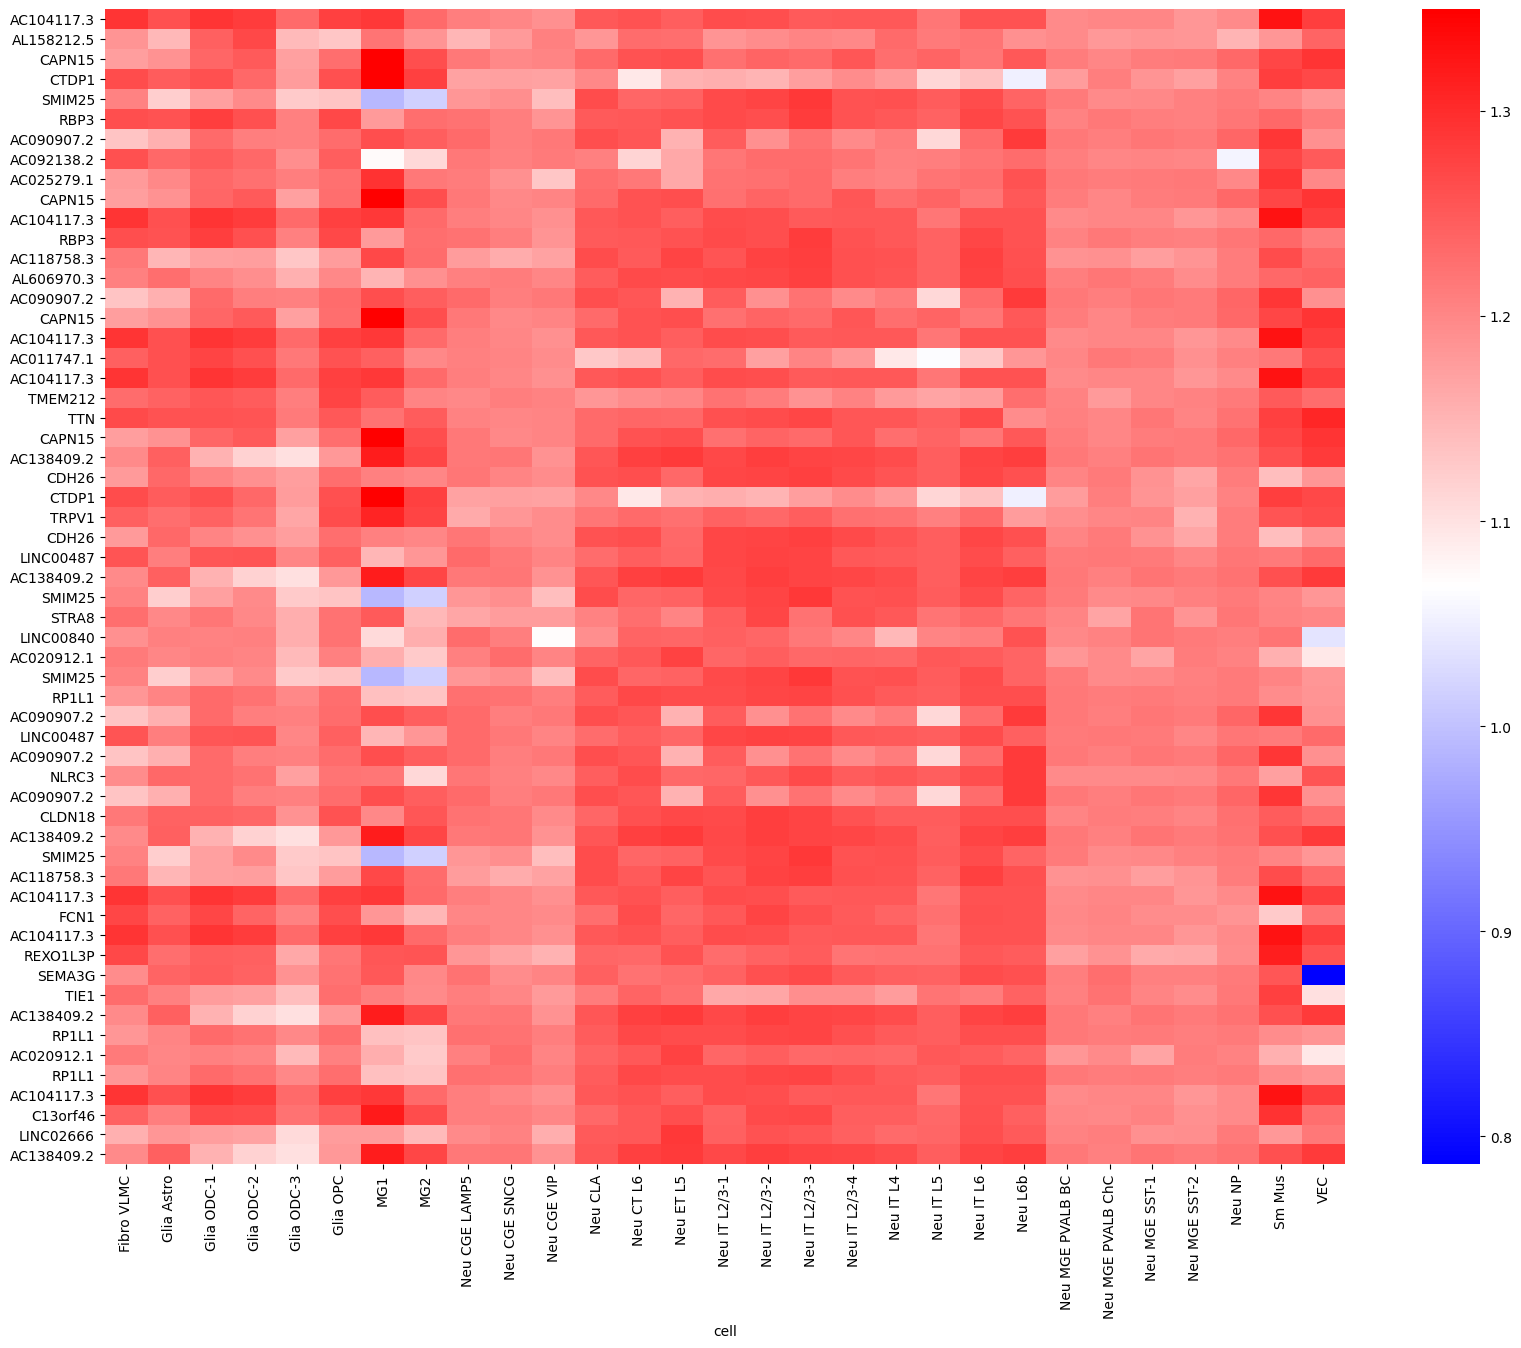

In [15]:
plt.figure(figsize=(20,15))
cg = sns.heatmap(paint_top2.T, cmap='bwr')

# dmr downsample

In [5]:
dmr_ds = RegionDS.open('/gale/netapp/home2/chl017/project/M1C/data/test_HIP')
dmr_ds

Using dmr as region_dim


<xarray.RegionDS>
Dimensions:                 (count_type: 2, dmr: 2093670, motif: 2179, motif-cluster: 286, motif_value: 3, sample: 29)
Coordinates:
  * count_type              (count_type) <U3 'mc' 'cov'
  * dmr                     (dmr) <U12 'chr1-0' 'chr1-1' ... 'chrY-11229'
    dmr_chrom               (dmr) <U5 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_end                 (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_length              (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_ndms                (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_start               (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
  * sample                  (sample) <U17 'Neu_CGE_SNCG' ... 'VEC'
    genome-features         <U9 'blacklist'
  * motif-cluster           (motif-cluster) <U4 'c1' 'c10' ... 'c98' 'c99'
  * motif_value             (motif_value) <U11 'n_motifs' ... 'total_score'
  * motif                   (motif) <U29 'ALX3_homeodomain_2' ... 'ZSC31_HUMA...
Data variables:
    dmr_da                  (sample, dmr, count_type) uint32 dask.array<chunksize=(5, 4096, 1), meta=np.ndarray>
    dmr_da_frac             (sample, dmr) float32 dask.array<chunksize=(5, 4096), meta=np.ndarray>
    dmr_state               (sample, dmr) int8 dask.array<chunksize=(5, 4096), meta=np.ndarray>
    dmr_motif-cluster_da    (motif-cluster, dmr, motif_value) uint16 dask.array<chunksize=(57, 4096, 1), meta=np.ndarray>
    dmr_motif_da            (dmr, motif, motif_value) uint16 dask.array<chunksize=(4096, 435, 1), meta=np.ndarray>
    dmr_genome-features_da  (dmr) bool dask.array<chunksize=(4096,), meta=np.ndarray>
Attributes:
    region_dim:          dmr
    region_ds_location:  /gale/netapp/home2/chl017/project/M1C/data/test_HIP
    chrom_size_path:     /gale/netapp/home2/chl017/project/M1C/data/test_HIP/...

In [6]:
dmr_ds = dmr_ds.drop_vars("dmr_genome-features_da")
dmr_ds = dmr_ds.drop_vars("genome-features")

In [7]:
dmr_ds

<xarray.RegionDS>
Dimensions:               (count_type: 2, dmr: 2093670, motif: 2179, motif-cluster: 286, motif_value: 3, sample: 29)
Coordinates:
  * count_type            (count_type) <U3 'mc' 'cov'
  * dmr                   (dmr) <U12 'chr1-0' 'chr1-1' ... 'chrY-11229'
    dmr_chrom             (dmr) <U5 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_end               (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_length            (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_ndms              (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    dmr_start             (dmr) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
  * sample                (sample) <U17 'Neu_CGE_SNCG' 'Neu_MGE_SST-1' ... 'VEC'
  * motif-cluster         (motif-cluster) <U4 'c1' 'c10' 'c100' ... 'c98' 'c99'
  * motif_value           (motif_value) <U11 'n_motifs' ... 'total_score'
  * motif                 (motif) <U29 'ALX3_homeodomain_2' ... 'ZSC31_HUMAN....
Data variables:
    dmr_da                (sample, dmr, count_type) uint32 dask.array<chunksize=(5, 4096, 1), meta=np.ndarray>
    dmr_da_frac           (sample, dmr) float32 dask.array<chunksize=(5, 4096), meta=np.ndarray>
    dmr_state             (sample, dmr) int8 dask.array<chunksize=(5, 4096), meta=np.ndarray>
    dmr_motif-cluster_da  (motif-cluster, dmr, motif_value) uint16 dask.array<chunksize=(57, 4096, 1), meta=np.ndarray>
    dmr_motif_da          (dmr, motif, motif_value) uint16 dask.array<chunksize=(4096, 435, 1), meta=np.ndarray>
Attributes:
    region_dim:          dmr
    region_ds_location:  /gale/netapp/home2/chl017/project/M1C/data/test_HIP
    chrom_size_path:     /gale/netapp/home2/chl017/project/M1C/data/test_HIP/...

In [8]:
tmp = dmr_ds.to_dataframe()

MemoryError: Unable to allocate 4.03 PiB for an array with shape (2, 2093670, 2179, 286, 3, 29) and data type <U5

In [ ]:
tmp = tmp[tmp['dmr_length']>70]

In [ ]:
large = tmp[tmp['dmr_state']!=0].nlargest(10,'dmr_da_frac')

In [ ]:
small = tmp[tmp['dmr_state']!=0].nsmallest(10,'dmr_da_frac')

In [ ]:
large

In [ ]:
small

In [ ]:
paint_state_large_10 = pd.DataFrame(large['dmr_state'].loc['mc']).unstack().T.droplevel(0)

In [ ]:
paint_state_small_10 = pd.DataFrame(small['dmr_state'].loc['mc']).unstack().T.droplevel(0)

In [ ]:
#paint_state_20 = pd.DataFrame(tmp['dmr_state'].loc['mc']).unstack().T.droplevel(0).iloc[:, 0:20]

In [ ]:
total = pd.concat([small, large])

In [ ]:
paint_state_total_10 = pd.DataFrame(total['dmr_state'].loc['mc']).unstack().T.droplevel(0)

In [ ]:
basic_info = pd.DataFrame()

In [ ]:
list(tmp.loc['mc'].iloc[0:580,:].drop(columns=["dmr_da", "dmr_da_frac", "dmr_state"]).loc["chr1-9"].iloc[0,:])

In [126]:
dmr_list_20 = ['chr1-9', 'chr1-19', 'chr1-30', 'chr1-31', 'chr1-33', 'chr1-38',
       'chr1-49', 'chr1-60', 'chr1-62', 'chr1-75', 'chr1-81', 'chr1-82',
       'chr1-84', 'chr1-92', 'chr1-93', 'chr1-97', 'chr1-105', 'chr1-107',
       'chr1-108', 'chr1-113']

In [134]:
for i in dmr_list_20:
    basic_info[i] = list(tmp.loc['mc'].iloc[0:580,:].drop(columns=["dmr_da", "dmr_da_frac", "dmr_state"]).loc[i].iloc[0,:])

In [139]:
basic_info.rename(index={0:'dmr_chrom', 1:'dmr_end', 2:'dmr_length', 3:'dmr_ndms', 4:'dmr_start'}).T

dmr_chrom dmr_end dmr_length dmr_ndms dmr_start
chr1-9        chr1   91190         72        3     91118
chr1-19       chr1  109178         73        2    109105
chr1-30       chr1  191723        967       30    190756
chr1-31       chr1  191950        203        8    191747
chr1-33       chr1  261753         87        2    261666
chr1-38       chr1  268128         78        4    268050
chr1-49       chr1  586281        128        3    586153
chr1-60       chr1  605510        181       26    605329
chr1-62       chr1  605700        184       12    605516
chr1-75       chr1  666257         89        6    666168
chr1-81       chr1  733203        157        5    733046
chr1-82       chr1  736609        108        7    736501
chr1-84       chr1  774839        205        6    774634
chr1-92       chr1  780132        229        2    779903
chr1-93       chr1  784647        156        3    784491
chr1-97       chr1  795466        475       15    794991
chr1-105      chr1  807868         95        3    807773
chr1-107      chr1  811484        128        4    811356
chr1-108      chr1  813166        319       10    812847
chr1-113      chr1  817462        170        9    817292

In [72]:
tmp = tmp[tmp['dmr_state']!=0]

In [10]:
tmp

dmr_chrom   dmr_end  dmr_length  dmr_ndms  \
count_type dmr        sample                                                    
mc         chr1-9     Glia_OPC           chr1     91190          72         3   
                      Neu_CGE_VIP        chr1     91190          72         3   
                      Glia_ODC-1         chr1     91190          72         3   
                      Glia_ODC-2         chr1     91190          72         3   
                      Glia_Astro         chr1     91190          72         3   
...                                       ...       ...         ...       ...   
cov        chrY-11156 Glia_ODC-1         chrY  26587809         193         2   
                      Glia_Astro         chrY  26587809         193         2   
                      Neu_IT_L2_3-1      chrY  26587809         193         2   
                      Neu_IT_L4          chrY  26587809         193         2   
                      Neu_NP             chrY  26587809         193         2   

                                     dmr_start  dmr_da  dmr_da_frac  dmr_state  
count_type dmr        sample                                                    
mc         chr1-9     Glia_OPC           91118       2     0.080000         -1  
                      Neu_CGE_VIP        91118      34     0.894737          1  
                      Glia_ODC-1         91118      16     0.173913         -1  
                      Glia_ODC-2         91118      10     0.277778         -1  
                      Glia_Astro         91118      11     0.177419         -1  
...                                        ...     ...          ...        ...  
cov        chrY-11156 Glia_ODC-1      26587616      57     0.175439         -1  
                      Glia_Astro      26587616      62     0.064516         -1  
                      Neu_IT_L2_3-1   26587616      38     0.789474          1  
                      Neu_IT_L4       26587616      19     0.842105          1  
                      Neu_NP          26587616       8     0.750000          1  

[8920320 rows x 8 columns]

In [41]:
#paint_hypo = pd.DataFrame(tmp[tmp["dmr_state"]==1]['dmr_da_frac'].loc['mc']).unstack().T.droplevel(0)
paint_hypo_large_10 = pd.DataFrame(large['dmr_da_frac'].loc['mc']).unstack().T.droplevel(0)

In [42]:
#paint_hyper = pd.DataFrame(tmp[tmp["dmr_state"]==-1]['dmr_da_frac'].loc['mc']).unstack().T.droplevel(0)
paint_hyper_small_10 = pd.DataFrame(small['dmr_da_frac'].loc['mc']).unstack().T.droplevel(0)

In [75]:
paint_all = pd.DataFrame(tmp['dmr_da_frac'].loc['mc']).unstack().T.droplevel(0)

In [76]:
#paint_all_20 = paint_all.iloc[:, 0:20]

In [77]:
#paint_hyper_20 = paint_hyper.iloc[:, 0:20]

In [78]:
#paint_hypo_20 = paint_hypo.iloc[:, 0:20]

In [109]:
paint_state_20.columns

Index(['chr1-9', 'chr1-19', 'chr1-30', 'chr1-31', 'chr1-33', 'chr1-38',
       'chr1-49', 'chr1-60', 'chr1-62', 'chr1-75', 'chr1-81', 'chr1-82',
       'chr1-84', 'chr1-92', 'chr1-93', 'chr1-97', 'chr1-105', 'chr1-107',
       'chr1-108', 'chr1-113'],
      dtype='object', name='dmr')

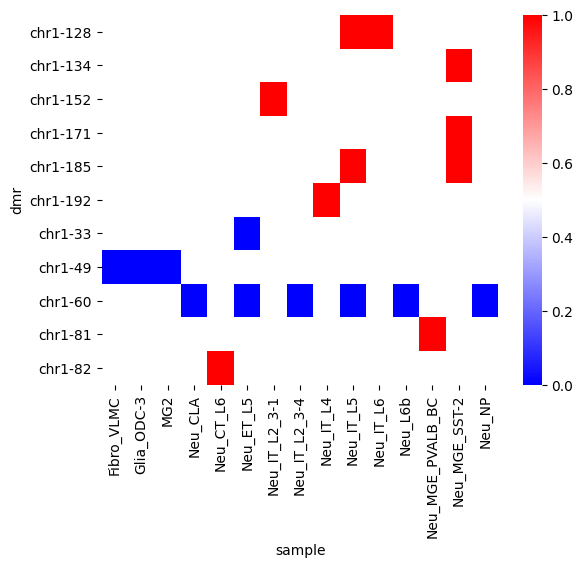

In [52]:
plt.figure(figsize=(9,9))
cg = sns.heatmap(paint_state_total_10.T, cmap='bwr', vmin=0, vmax=1)

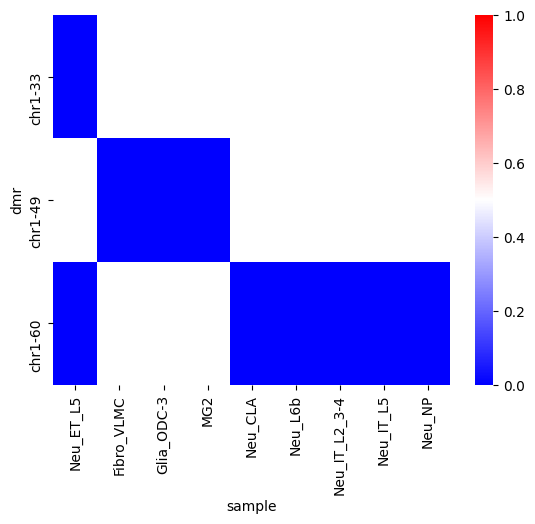

In [46]:
cg = sns.heatmap(paint_state_small_10.T, cmap='bwr', vmin=0, vmax=1)

In [87]:
paint_hyper_20.fillna(100)

dmr                    chr1-9     chr1-19     chr1-30     chr1-31     chr1-33  \
sample                                                                          
Neu_CGE_SNCG       100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_MGE_SST-1      100.000000  100.000000  100.000000  100.000000  100.000000   
Fibro_VLMC         100.000000  100.000000  100.000000  100.000000  100.000000   
Glia_ODC-3         100.000000  100.000000  100.000000  100.000000  100.000000   
MG2                100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_ET_L5          100.000000  100.000000  100.000000  100.000000    0.000000   
Neu_CGE_LAMP5      100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_CT_L6          100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_CLA            100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_L6b            100.000000  100.000000  100.000000  100.000000  100.000000   
Glia_OPC             0.080000    0.333333    0.091429    0.095238  100.000000   
Neu_MGE_PVALB_ChC  100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_CGE_VIP        100.000000  100.000000    0.162791  100.000000  100.000000   
Neu_MGE_PVALB_BC   100.000000  100.000000  100.000000  100.000000  100.000000   
MG1                100.000000  100.000000  100.000000  100.000000  100.000000   
Glia_ODC-1           0.173913    0.190476    0.094294    0.015244  100.000000   
Glia_ODC-2           0.277778    0.275000    0.063702    0.025478  100.000000   
Glia_Astro           0.177419  100.000000    0.200000  100.000000  100.000000   
Neu_IT_L2_3-2      100.000000  100.000000  100.000000  100.000000    0.062500   
Neu_IT_L2_3-1      100.000000  100.000000  100.000000  100.000000    0.164384   
Neu_IT_L2_3-3      100.000000  100.000000  100.000000  100.000000    0.153846   
Neu_MGE_SST-2      100.000000  100.000000  100.000000    0.276316  100.000000   
Neu_IT_L2_3-4      100.000000  100.000000  100.000000  100.000000    0.081633   
Neu_IT_L4          100.000000  100.000000  100.000000  100.000000    0.366667   
Neu_IT_L5          100.000000  100.000000  100.000000  100.000000    0.104167   
Neu_IT_L6          100.000000  100.000000  100.000000  100.000000  100.000000   
Sm_Mus             100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_NP             100.000000  100.000000  100.000000  100.000000  100.000000   
VEC                100.000000    0.352941  100.000000  100.000000  100.000000   

dmr                   chr1-38     chr1-49     chr1-60     chr1-62     chr1-75  \
sample                                                                          
Neu_CGE_SNCG       100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_MGE_SST-1      100.000000  100.000000  100.000000  100.000000  100.000000   
Fibro_VLMC         100.000000    0.000000  100.000000    0.086957  100.000000   
Glia_ODC-3         100.000000    0.000000  100.000000  100.000000  100.000000   
MG2                100.000000    0.000000  100.000000  100.000000  100.000000   
Neu_ET_L5          100.000000  100.000000    0.000000    0.000000  100.000000   
Neu_CGE_LAMP5      100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_CT_L6          100.000000  100.000000    0.010000    0.000000  100.000000   
Neu_CLA            100.000000  100.000000    0.000000    0.047619  100.000000   
Neu_L6b            100.000000  100.000000    0.000000    0.000000  100.000000   
Glia_OPC             0.063492    0.016667  100.000000  100.000000    0.033898   
Neu_MGE_PVALB_ChC  100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_CGE_VIP        100.000000  100.000000  100.000000  100.000000  100.000000   
Neu_MGE_PVALB_BC   100.000000  100.000000  100.000000  100.000000  100.000000   
MG1                  0.186813  100.000000  100.000000  100.000000  100.000000   
Glia_ODC-1           0.103152    0.060533  100.000000  100.000000    0.122924   
Glia_ODC-2         100.000000 

<AxesSubplot:xlabel='sample', ylabel='dmr'>

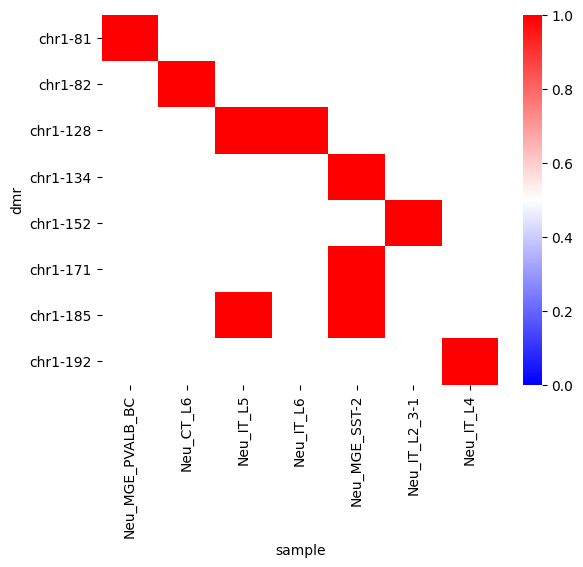

In [47]:
sns.heatmap(paint_hypo_large_10.T, cmap='bwr', vmin=0, vmax=1)

<AxesSubplot:xlabel='sample', ylabel='dmr'>

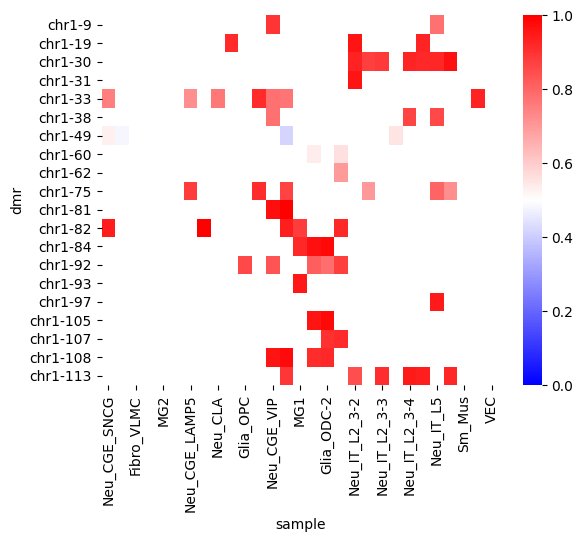

In [92]:
sns.heatmap(paint_hypo_20.T, cmap='bwr', vmin=0, vmax=1)

In [75]:
tmp[tmp['dmr_state']!=0]

dmr_chrom   dmr_end  dmr_length  dmr_ndms  \
count_type dmr        sample                                                    
mc         chr1-9     Glia_OPC           chr1     91190          72         3   
                      Neu_CGE_VIP        chr1     91190          72         3   
                      Glia_ODC-1         chr1     91190          72         3   
                      Glia_ODC-2         chr1     91190          72         3   
                      Glia_Astro         chr1     91190          72         3   
...                                       ...       ...         ...       ...   
cov        chrY-11156 Glia_ODC-1         chrY  26587809         193         2   
                      Glia_Astro         chrY  26587809         193         2   
                      Neu_IT_L2_3-1      chrY  26587809         193         2   
                      Neu_IT_L4          chrY  26587809         193         2   
                      Neu_NP             chrY  26587809         193         2   

                                     dmr_start  dmr_da  dmr_da_frac  dmr_state  
count_type dmr        sample                                                    
mc         chr1-9     Glia_OPC           91118       2     0.080000         -1  
                      Neu_CGE_VIP        91118      34     0.894737          1  
                      Glia_ODC-1         91118      16     0.173913         -1  
                      Glia_ODC-2         91118      10     0.277778         -1  
                      Glia_Astro         91118      11     0.177419         -1  
...                                        ...     ...          ...        ...  
cov        chrY-11156 Glia_ODC-1      26587616      57     0.175439         -1  
                      Glia_Astro      26587616      62     0.064516         -1  
                      Neu_IT_L2_3-1   26587616      38     0.789474          1  
                      Neu_IT_L4       26587616      19     0.842105          1  
                      Neu_NP          26587616       8     0.750000          1  

[8920320 rows x 8 columns]

In [71]:
tmp.nlargest(1, 'dmr_length')

dmr_chrom   dmr_end  dmr_length  dmr_ndms  \
count_type dmr         sample                                                   
mc         chr17-69705 Neu_CGE_SNCG     chr17  81066616        8175       438   

                                     dmr_start  dmr_da  dmr_da_frac  dmr_state  
count_type dmr         sample                                                   
mc         chr17-69705 Neu_CGE_SNCG   81058441    3913     0.908521          0

In [72]:
tmp.nsmallest(1, 'dmr_length')

dmr_chrom  dmr_end  dmr_length  dmr_ndms  \
count_type dmr      sample                                                  
mc         chr1-262 Neu_CGE_SNCG      chr1   923237          71         8   

                                  dmr_start  dmr_da  dmr_da_frac  dmr_state  
count_type dmr      sample                                                   
mc         chr1-262 Neu_CGE_SNCG     923166      64     0.927536          1